In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab5.ipynb")

# Lab 5 - Maps, Colors & Legends

The questions in each lab will be autograded, and all the autograded tests will give you immediate feedback directly in the notebook. This way you can quickly iterate and learn how to create your visualization during the lab time. After you upload your lab on gradescope, the same tests will run again and you will be able to see your score right away.

## Submission instructions

<div class="alert alert-info" style="color:black">
<ul>
  <li>Download this lab from the Jupyter Book web page by clicking the download symbol at the top right of the page and selecting the <code>.ipynb</code> format.</li>
  <li>To submit this lab, answer all the questions and then upload the completed lab to Gradescope.</li>
    <ul>
      <li>Before submitting, make sure you restart the kernel and rerun all cells (click the ▶▶ button).</li>
    </ul>
  <li>Don't change any variable names that are given to you, don't move cells around, and don't include any code to install packages in the notebook.</li>
  </li>
</ul>
</div>

## Alcohol consumption around the world

In this lab we will be looking closer at how alcohol consumption is linked to morbidity.
This data comes from the excellent site "Our world in data", [where you can read more about this topic if you are interested](https://ourworldindata.org/alcohol-consumption). You can follow along in the next cell to see how we read in and clean the data.

In [2]:
import pandas as pd
# This data set contains the country IDs we need to link our dataset to the world map later on
country_ids = pd.read_csv('https://raw.githubusercontent.com/joelostblom/teaching-datasets/main/country-ids-and-continents.csv')
relevant_country_names = country_ids["Country"]
country_ids.head()

,ID,Country,Continent
0,4,Afghanistan,Asia
1,8,Albania,Europe
2,12,Algeria,Africa
3,24,Angola,Africa
4,10,Antarctica,Antarctica


In [3]:

alcohol = pd.read_csv(
    'https://raw.githubusercontent.com/joelostblom/teaching-datasets/main/alcohol-consumption-vs-gdp-per-capita.csv',
    parse_dates=['Year']
).rename(  # Abbreviate key column names
    columns={
        'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)': 'Liters_per_capita',
        'GDP per capita, PPP (constant 2017 international $)': 'GDP_per_capita',
        'Population (historical estimates)': 'Population',
        'Entity': 'Country'
    }
).drop(  # Drop empty continent column
    columns=['Continent']
).query(  # Simplify the dataset
    'Year == "2018" & Country in @relevant_country_names'
    #'Year == "2018" & Country in @country_ids["Country"]' # may not work on all systems
).merge(  # Merge in the ID column
    country_ids,
)
alcohol

,Country,Code,Year,Liters_per_capita,GDP_per_capita,Population,ID,Continent
0,Afghanistan,AFG,2018,0.210,2033.804389,37171922.0,4,Asia
1,Albania,ALB,2018,7.170,13323.753356,2882735.0,8,Europe
2,Algeria,DZA,2018,0.950,11642.198345,42228415.0,12,Africa
3,Angola,AGO,2018,6.940,6933.499934,30809787.0,24,Africa
4,Argentina,ARG,2018,9.650,22759.398558,44361150.0,32,South America
...,...,...,...,...,...,...,...,...
159,Vietnam,VNM,2018,8.660,7585.943155,95545959.0,704,Asia
160,Western Sahara,ESH,2018,NaN,NaN,567396.0,732,Africa
161,Yemen,YEM,2018,0.051,NaN,28498683.0,887,Asia
162,Zambia,ZMB,2018,6.540,3521.542063,17351714.0,894,Africa


In [4]:
# Run this cell to ensure that altair plots show up on gradescope
# We will talk more about what these lines do later in the course
import altair as alt

# Handle large data sets without embedding them in the notebook
#alt.data_transformers.enable('data_server')
# Include an image for each plot since Gradescope only supports displaying plots as images
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

### Question 1

<div class="alert alert-info" style="color:black">

<ol type="1">
<li>As TopoJSON is a specialized format, we need to instruct Altair to parse the TopoJSON format, indicating which named faeture object we wish to extract from the topology. In the first cell below indicate that we want to extract GeoJSON features from the world dataset for the countries object. Then using <b>world_map</b> create a Chart using the <b>mark_geoshape()</b>
<li>Create a choropleth showing the amount of alcohol consumed per capita in each country. Remember that you first need to read in the sample world map dataframe from the vega sample datasets and then use a transform lookup to link the alcohol and world map datasets together. Set the tooltop to show the name of the country on hover and use the <code>'equalEarth'</code> projection to more fairly represent country sizes. Increase the size of the chart so that it is easier to see the countries.</li>
<li>Take the chart you made in the previous question and try out a few different color schemes to represent the color values. Based on the Color lecture, select one that you think is at least as effective as the default one in Altair and <b>describe</b> how it differs from the default and why it is effective for this task.</li>
</ol>
</div>

_Points:_ 20

_Type your answer here, replacing this text._

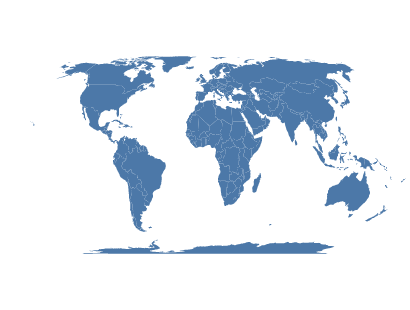

In [5]:
# 1.
# Prof said to have the import statement here
from vega_datasets import data
world = data.world_110m.url
world_map = alt.topo_feature(world, "countries")
# Create a chart using the data above and geoshape mark
country_map = alt.Chart(world_map).mark_geoshape()
country_map

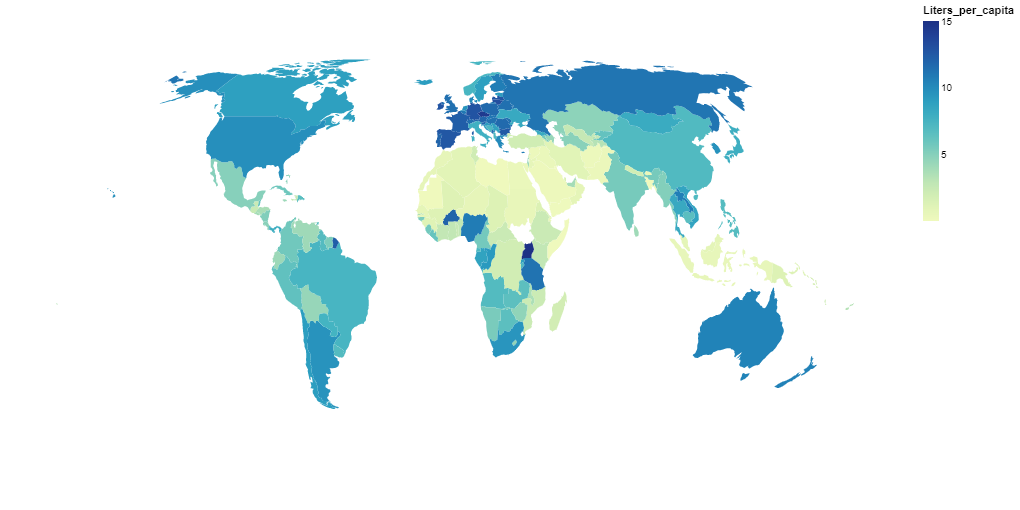

In [6]:
# 2.
choropleth = alt.Chart(world_map).mark_geoshape(
).transform_lookup(
   lookup="id",
   from_=alt.LookupData(data=alcohol, key='ID', fields=["Country", "Liters_per_capita"])
).encode(
   alt.Color("Liters_per_capita:Q"),
   alt.Tooltip("Country:N")
).project(
    type="equalEarth",
    scale=150
).properties(
    width=900,
    height=500
)
# Show the chart
choropleth

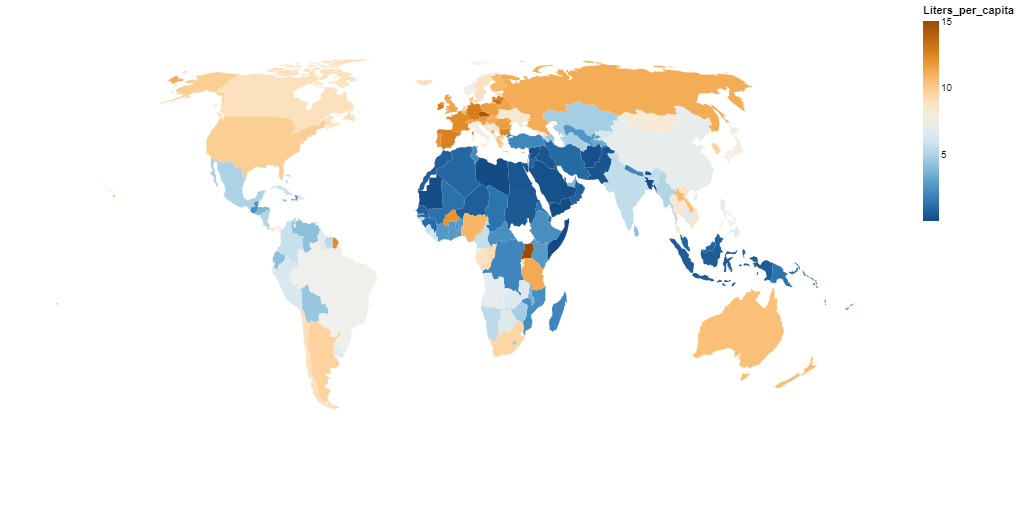

In [7]:
# 3.
choropleth_custom_color = alt.Chart(world_map).mark_geoshape(
).transform_lookup(
   lookup="id",
   from_=alt.LookupData(data=alcohol, key='ID', fields=["Country", "Liters_per_capita"])
).encode(
   alt.Color("Liters_per_capita:Q",
            scale=alt.Scale(scheme="blueorange")),
   alt.Tooltip("Country:N")
).project(
    type="equalEarth",
    scale=150
).properties(
    width=900,
    height=500
)
# Show the chart
choropleth_custom_color

In [8]:
grader.check("q1")

q1 results: All test cases passed!

### Question 2

<div class="alert alert-info" style="color:black">

<ol type="1">
<li>Remember that choropleths can be tricky to read since the area of each region affects how we perceive the visualization although it is not related to the value of interest (alcohol consumption per capita). Look at the choropleths you just made in the previous question and try to get a sense for the top alcohol consuming countries, then create a bar plot to assess whether you were correct. In the barplot, include the 20 top countries in alcohol consumption and color the bars according to the continent. (Hint: the <code>nlargest</code> function can be useful here).</li>
<li>Create a <b>sorted</b> bar chart of how much alcohol contributes to the overall death in each country
for the top 20 countries in alcohol consumption from the previous chart
and color each bar by which continent the country belongs to.
Compare it with the choropleth of alcohol consumption,
do you think the two visualizations aligns?
<li>
Let's explore the relationship between alcohol consumption and mortality closer.
Create a scatter plot with mortality on the x axis and consumption on the y axis.
Include all countries in the scatter plot and not just the top 20.
Color the points according to the continent and at a tooltip for the country.
Why do you think there are some differences between the two
(why are not all countries with high consumption also high in the fraction of death)?</li>
</li>
</ol>
</div>

_Points:_ 28

_Type your answer here, replacing this text._

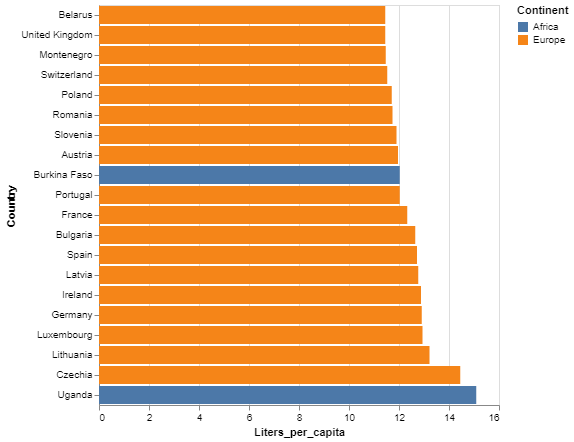

In [9]:
# 1.
top20_consumption = alcohol.nlargest(n=20, columns ="Liters_per_capita")

bars_consumption = alt.Chart(top20_consumption).mark_bar().encode(
    x = alt.X("Liters_per_capita"),
    y = alt.Y("Country", sort = "x"),
    color = alt.Color("Continent")
)
# Show the chart
bars_consumption

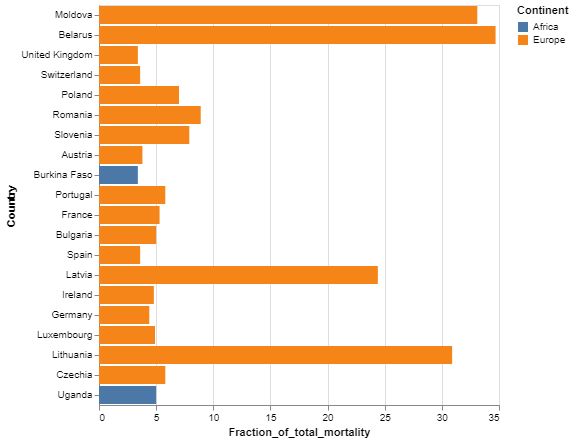

In [10]:
# 2.
# Given code to read in data
alcohol_mortality = pd.read_csv(
    'https://raw.githubusercontent.com/joelostblom/teaching-datasets/main/alcohol-attributable-fraction-of-mortality.csv',
    parse_dates=['Year']
).rename(
    columns={
        'Indicator:Alcohol-attributable fractions, all-cause deaths (%) - Sex:Both sexes': 'Fraction_of_total_mortality',
        'Entity': 'Country'
    }
).merge(
    alcohol[['Country', 'ID', 'Continent', 'Liters_per_capita']],
    on=['Country']
).dropna()

top20_mortality = alcohol_mortality.nlargest(20, "Liters_per_capita")

bars_mortality = alt.Chart(top20_mortality).mark_bar().encode(
    alt.X("Fraction_of_total_mortality:Q"),
    alt.Y('Country:N', sort=alt.EncodingSortField(field='Liters_per_capita')),
    color='Continent:N')
# Show the chart
bars_mortality

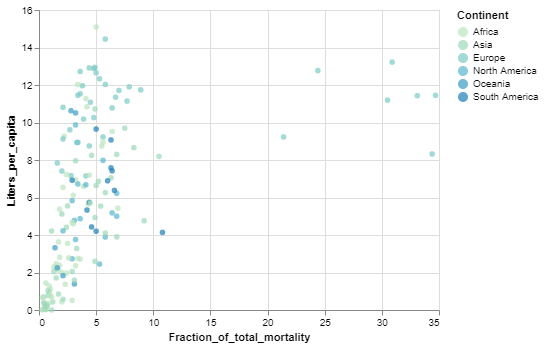

In [11]:
# 3.
scatter_consumption_mortality = alt.Chart(alcohol_mortality).mark_circle().encode(
    x=alt.X('Fraction_of_total_mortality'),
    y=alt.Y('Liters_per_capita:Q'),
    color=alt.Color('Continent:N', scale=alt.Scale(scheme='greenblue')),
    tooltip='Country:N'
)
# Show the chart
scatter_consumption_mortality

In [12]:
grader.check("q2")

q2 results: All test cases passed!

## Question 3

<div class="alert alert-info" style="color:black">

<ol type="1">
<li>Read in the dataframe with alcohol consumption and create a heatmap for the consumption over time with each nation on its own row and the consumption across the x-axis as an ordinal variable.</li>
<li>Visualize the same data with a line chart where each country is a different line. Comment on which advantages and disadvantages the lines chart has compared to the heatmap.</li>
</ol>
</div>

_Points:_ 14

_Type your answer here, replacing this text._

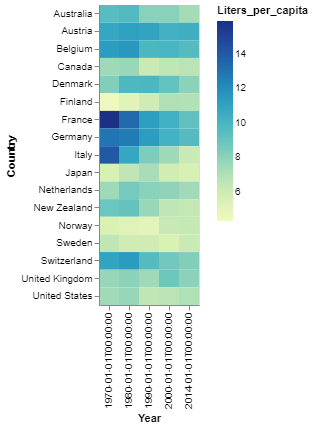

In [13]:
# Given code to read in the data
historic_consumption = pd.read_csv(
    'https://raw.githubusercontent.com/joelostblom/teaching-datasets/main/per-capita-alcohol-1890.csv',
    parse_dates=['Year']
).rename(
    columns={
        'Alcohol consumption since 1890 (Alexander & Holmes, 2017)': 'Liters_per_capita',
        'Entity': 'Country'
    }
).query(  # Only include data from the 1960s and onwards since not all countries have data before that
    'Year > 1960'
)

heatmap_consumption = alt.Chart(historic_consumption).mark_rect().encode(
    x='Year:O',
    y='Country',
    color=alt.Color('Liters_per_capita:Q')
).properties(width=100, height=300)
# Show the chart
heatmap_consumption

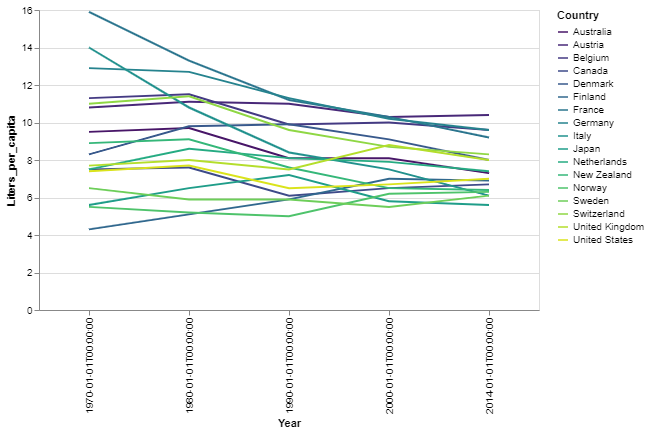

In [14]:
lines_consumption = alt.Chart(historic_consumption).mark_line().encode(
    x='Year:O',
    y='Liters_per_capita:Q',
    color=alt.Color('Country:O', scale=alt.Scale(scheme='viridis'))
).properties(width=500, height=300)
# Show the chart
lines_consumption

In [15]:
grader.check("q3")

q3 results: All test cases passed!

## Question 4

<div class="alert alert-info" style="color:black">

<ol type="1">
<li>Use the <code>alcohol</code> dataframe that we loaded in the first question to create a scatter plot of alcohol consumption versus GDP. Put GDP on the x-axis and alcohol consumption on the y-axis. Color the points by which continent they belong to, add the country as a tooltip and scale their size by their population.
Set the range of the size scale to <code>(10, 500)</code> so that all points are easily visible and easy to hover on for the tooltip.</li>
<li>As you can see there are some countries with really high GDP which makes the chart appear compressed. To remedy this, create a new chart that uses a log-axis on the x-axis (make sure to set <code>nice=False</code> to ensure that the axis is scaled closer to the x-min and x-max).</li>
<li>Create a scatter plot of the female vs male alcohol disorder data for each Country using the 2015 values. Color the country points by their continent, set the tooltip to the country, and the size to the population. To more easily compare the female and male alcohol disorder proportions, make sure that the width and height of the chart are equal and that the axis domains are the same. This way you can more easily look above and below and imaginary diagonal line in the chart to quickly assess whether the proportion is bigger among females or males.</li>
</ol>
</div>

_Points:_ 20

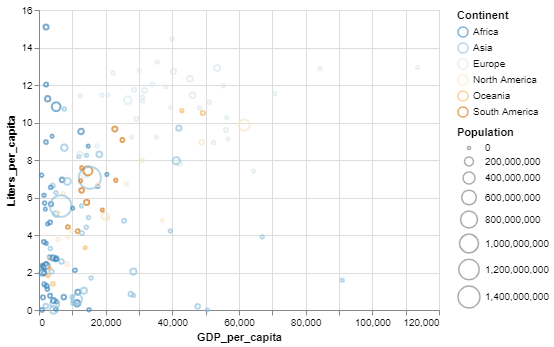

In [16]:
# 1.
scatter_consumption_gdp = alt.Chart(alcohol).mark_point().encode(
    x=alt.X('GDP_per_capita:Q'),
    y=alt.Y('Liters_per_capita:Q'),
    color=alt.Color('Continent:N', scale=alt.Scale(scheme='blueorange')),
    tooltip='Country:N',
    size=alt.Size('Population:Q', scale=alt.Scale(range=(10, 500)))
)
# Show the chart
scatter_consumption_gdp

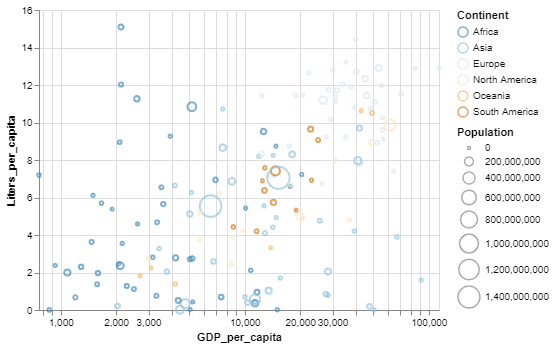

In [17]:
# 2.
scatter_consumption_gdp_log = alt.Chart(alcohol).mark_point().encode(
    x=alt.X('GDP_per_capita:Q', scale=alt.Scale(type = "log", nice = False)),
    y=alt.Y('Liters_per_capita:Q'),
    color=alt.Color('Continent:N', scale=alt.Scale(scheme='blueorange')),
    tooltip='Country:N',
    size=alt.Size('Population', scale=alt.Scale(range=(10, 500)))
)
# Show the chart
scatter_consumption_gdp_log 

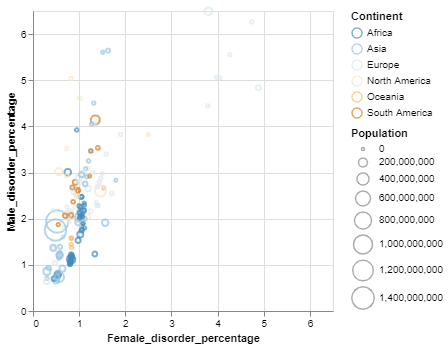

In [18]:
# 3.
# Given code to read in the data
alcohol_disorder = pd.read_csv(
    'https://raw.githubusercontent.com/joelostblom/teaching-datasets/main/prevalence-of-alcohol-disorders-males-vs-females.csv',
    parse_dates=['Year']
).rename(
    columns={
        'Prevalence - Alcohol use disorders - Sex: Male - Age: Age-standardized (Percent)': 'Male_disorder_percentage',
        'Prevalence - Alcohol use disorders - Sex: Female - Age: Age-standardized (Percent)': 'Female_disorder_percentage',
        'Population (historical estimates)': 'Population',
        'Entity': 'Country'
    }
).query(
    'Year == "2015" & Country in @relevant_country_names'
    # 'Year == "2015" & Country in @country_ids["Country"]' # error
)

scatter_disorder = alt.Chart(alcohol_disorder).mark_point().encode(
    x=alt.X('Female_disorder_percentage:Q', scale=alt.Scale(domain=(0, 6.5))),
    y=alt.Y('Male_disorder_percentage:Q'),
    color=alt.Color('Continent:N', scale=alt.Scale(scheme='blueorange')),
    tooltip='Country:N',
    size=alt.Size('Population', scale=alt.Scale(range=(10, 500)))
).properties(width=300, height=300)
# Show the chart
scatter_disorder

In [19]:
grader.check("q4")

q4 results: All test cases passed!

<div class="alert alert-danger" style="color:black">
    
**Restart and run all before submitting**
    
Before submitting,
don't forget to run all cells in your notebook
to make sure there are no errors.
You can do this by clicking the ▶▶ button
or going to `Kernel -> Restart Kernel and Run All Cells...` in the menu.
This is not only important for this course,
but a good habit you should get into before ever committing a notebook to GitHub,
so that your collaborators can run it from top to bottom
without issues.
</div>